# other figure from paper on 3D

In [1]:
%load_ext autoreload
%autoreload 2

In [55]:
 # trick to import a resipy from a local copy (you won't need that if you `pip install resipy`)
import sys 
sys.path.append('../src')

from resipy import Project
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

datadir = '../src/examples/dc-3d/'
figdir = '../src/image/paper3d/'

## 3D features

In [51]:
k = Project(typ='R3t')
k.createSurvey(datadir + 'protocol.dat', ftype='ProtocolDC')
k.importElec(datadir + 'elec.csv')
k.createMesh()
k.invert()

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
0/644 reciprocal measurements found.
Creating tetrahedral mesh...fmd in gmshWrap.py: 16.343534
writing .geo to file completed, save location:
/media/jkl/data/phd/tmp/resipy/src/resipy/invdir

Reading mesh3d.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Tetrahedra
Reading connection matrix...
ignoring 7581 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
interpolating topography onto mesh using triangulate interpolation...done
Done
ResIPy Estimated RAM usage = 0.164347 Gb
done
Writing .in file and protocol.dat... done!

--------------------- MAIN INVERSION ------------------


 >> R 3 t     E R T    M o d e l    v 2.30 <<

 >> Date: 01-02-2021
 >> My beautiful 3D survey                                                          
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> A d v a n c e d   M e s h   I n p u t <<
 >> T e

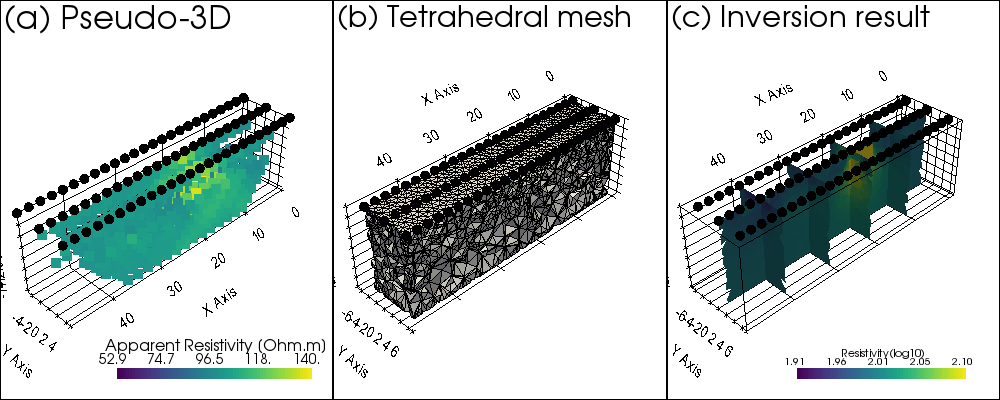

In [57]:
pl = pv.Plotter(shape=(1,3), window_size=[1000, 400])
pl.subplot(0, 0)
pl.add_text('(a) Pseudo-3D', color='k')
k.showPseudo(ax=pl, threed=True, pvshow=False)
pl.subplot(0, 1)
pl.add_text('(b) Tetrahedral mesh', color='k')
k.showMesh(ax=pl, pvshow=False)
pl.subplot(0, 2)
pl.add_text('(c) Inversion result', color='k')
k.showResults(ax=pl, attr='Resistivity(log10)', vmax=2.1, background_color=(1,1,1),
              pvslices=[[10,20,30,40],[0],[]], pvshow=False)
pl.show(screenshot=figdir + 'feat-3d.jpg');

Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.


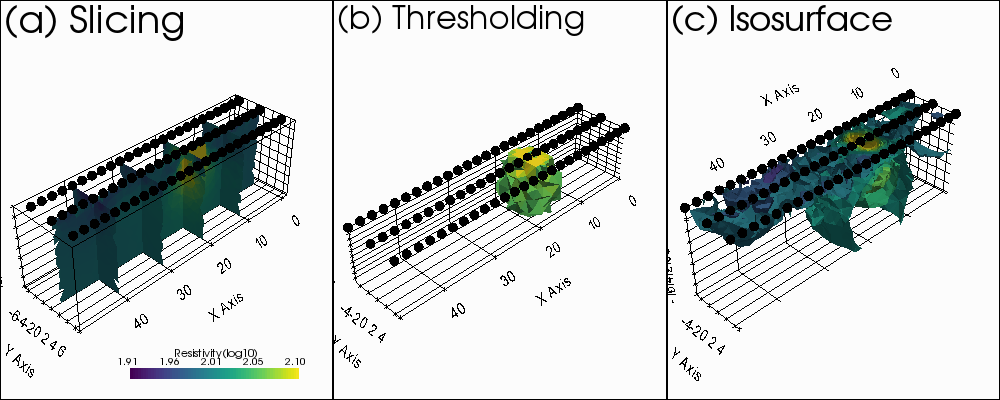

In [68]:
pl = pv.Plotter(shape=(1,3), window_size=[1000, 400])
background_color=(0.99, 0.99, 0.99) # if 1, legend doesn't show up
pl.subplot(0, 0)
pl.add_text('(a) Slicing', color='k')
k.showResults(ax=pl, attr='Resistivity(log10)', vmax=2.1, background_color=background_color,
              pvslices=[[10,20,30,40],[0],[]], pvshow=False)
pl.subplot(0, 1)
pl.add_text('(b) Thresholding', color='k')
k.showResults(ax=pl, attr='Resistivity(log10)', vmax=2.1, background_color=background_color,
              pvthreshold=2.05, pvshow=False)
pl.subplot(0, 2)
pl.add_text('(c) Isosurface', color='k')
k.showResults(ax=pl, attr='Resistivity(log10)', vmax=2.1, background_color=background_color,
              pvcontour=np.linspace(1.9, 2.1, 10), pvshow=False)
pl.show(screenshot=figdir + 'pyvista-option.jpg');

## Mesh refinement

In [70]:
k = Project(typ='R3t')
elec = np.zeros((30,3))
elec[:,0] = np.repeat([1,2,3],10)
elec[:,1] = np.tile(np.arange(10), 3)
k.setElec(elec)
k.createMesh('tetra')
meshRefined = k.mesh.refine()

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
Creating tetrahedral mesh...fmd in gmshWrap.py: 3.073181
writing .geo to file completed, save location:
/media/jkl/data/phd/tmp/resipy/src/resipy/invdir

Reading mesh3d.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Tetrahedra
Reading connection matrix...
ignoring 1442 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
interpolating topography onto mesh using triangulate interpolation...done
Done
A survey needs to imported before a memory usage estimate can be made
done


Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.


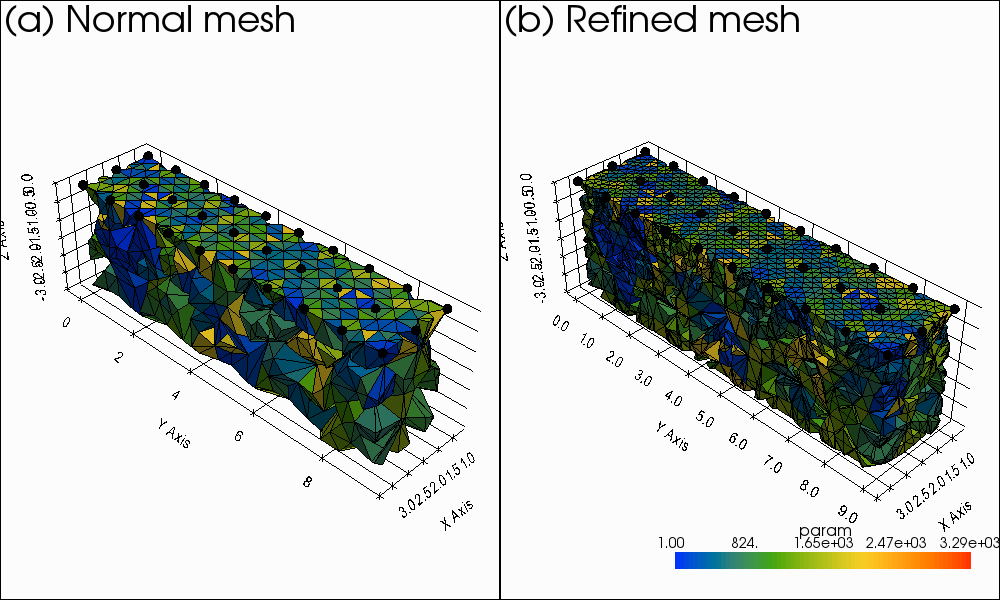

In [72]:
pl = pv.Plotter(shape=(1, 2), notebook=True, window_size=[1000,600])
pl.subplot(0, 0)
pl.add_text('(a) Normal mesh', color='k')
k.showMesh(attr='param', ax=pl, pvshow=False, color_map='rainbow', background_color=(0.99,0.99,0.99))
pl.subplot(0, 1)
pl.add_text('(b) Refined mesh', color='k')
meshRefined.show(attr='param', ax=pl, pvshow=False, color_map='rainbow', background_color=(0.99,0.99,0.99),
                 zlim=[-3,0])
pl.show(screenshot=figdir + 'mesh-refinement.jpg');

## Benchmarking advanced mesh?